## Data exchange between neighbor arrays

The implementation of `exchange` functions is a central concept of `MeshArrays.jl` illustrated here through a basic example. It is further used in `03_smoothing.ipynb` that applies diffusion over the surface of a sphere.

#### First, Let's load the `MeshArrays.jl` and `Plots.jl` package modules

In [1]:
using MeshArrays, Plots

Download the pre-defined grid if needed

In [2]:
if !isdir("../inputs/GRID_CS32") 
    run(`git clone https://github.com/gaelforget/GRID_CS32 ../inputs/GRID_CS32`)
end

Select `cube sphere` grid and read `ocean depth` variable

In [3]:
mygrid=GridSpec("CS32","../inputs/")
D=mygrid.read(mygrid.path*"Depth.data",MeshArray(mygrid,Float32))
show(D)

 gcmarray 
  grid type   = cs
  data type   = Float32
  tile array  = (6,)
  tile sizes  = (32, 32)
                (32, 32)
                (32, 32)
                (32, 32)
                (32, 32)
                (32, 32)


#### Use the `exchange` function

It will add neighboring points at face edges as seen below

In [4]:
Dexch=exchange(D,4)
show(Dexch)

 gcmarray 
  grid type   = cs
  data type   = Float32
  tile array  = (6,)
  tile sizes  = (40, 40)
                (40, 40)
                (40, 40)
                (40, 40)
                (40, 40)
                (40, 40)


We can also illustrate what happened using `Plots.jl`

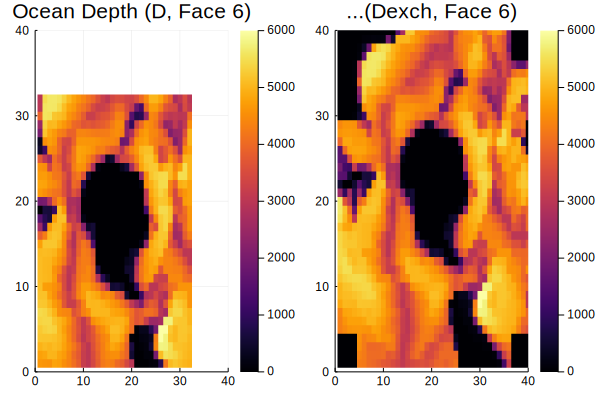

In [5]:
P=heatmap(D.f[6],title="Ocean Depth (D, Face 6)",lims=(0,40))
Pexch=heatmap(Dexch.f[6],title="...(Dexch, Face 6)",lims=(0,40))
plot(P,Pexch)